In [43]:
import pandas as pd
import itertools
import geopy, shapely
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [31]:
entries = pd.read_csv('nyra_start_table_new.csv')
races = pd.read_csv('nyra_race_table.csv')
tracking = pd.read_csv('nyra_tracking_table.csv')


In [32]:
runs = tracking.groupby(['race_date','race_number','program_number'])

In [33]:
runs = runs[['latitude','longitude','trakus_index']]

In [34]:
len(runs)

14915

In [35]:
sequences = pd.DataFrame(columns=['race_data','race_number','program_number','running'])

In [36]:
frame = pd.DataFrame(runs,columns=['race_data','running'])
frame['race_date'] = frame['race_data'].apply(lambda r:r[0])
frame['race_number'] = frame['race_data'].apply(lambda r:r[1])
frame['program_number'] = frame['race_data'].apply(lambda r:r[2])
frame.drop(['race_data'],axis=1,inplace=True)
frame

,running,race_date,race_number,program_number
0,latitude longitude trakus_index 867...,2019-01-01,1,1
1,latitude longitude trakus_index 11...,2019-01-01,1,2
2,latitude longitude trakus_index 12...,2019-01-01,1,3
3,latitude longitude trakus_index 20...,2019-01-01,1,4
4,latitude longitude trakus_index 190...,2019-01-01,1,5
...,...,...,...,...
14910,latitude longitude trakus_index 23...,2019-12-31,8,5
14911,latitude longitude trakus_index 36...,2019-12-31,8,6
14912,latitude longitude trakus_index 36...,2019-12-31,8,7
14913,latitude longitude trakus_index 42...,2019-12-31,8,8


In [75]:
frame[['race_date','race_number']].value_counts()

race_date   race_number
2019-11-15  5              14
2019-07-06  9              14
2019-12-21  6              13
2019-12-28  8              13
2019-11-11  7              13
                           ..
2019-06-21  6               3
            4               3
2019-06-16  3               3
2019-07-19  9               3
2019-07-11  10              3
Name: count, Length: 2000, dtype: int64

In [81]:
frame.iloc[0][3]

/var/folders/7r/r2s5qqq505q1dy3w3pxj6rnc0000gn/T/ipykernel_7935/1584052280.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frame.iloc[0][3]


'1  '

In [73]:
analyses =frame.iloc[0][0]
analyses

/var/folders/7r/r2s5qqq505q1dy3w3pxj6rnc0000gn/T/ipykernel_7935/1187318306.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  analyses =frame.iloc[0][0]


,latitude,longitude,trakus_index
867100,40.669564,-73.829133,11
867101,40.669594,-73.829119,12
867102,40.669625,-73.829105,13
867103,40.669657,-73.829090,14
867104,40.669690,-73.829076,15
...,...,...,...
867411,40.669795,-73.829029,18
867412,40.669832,-73.829012,19
867413,40.669870,-73.828995,20
867414,40.669909,-73.828978,21


<Figure size 640x480 with 0 Axes>

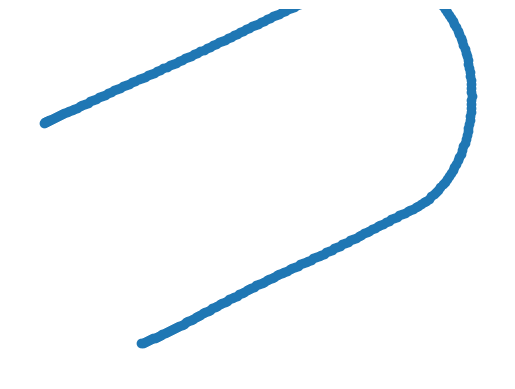

In [ ]:
plt.ioff();
plt.tight_layout()
fig, ax = plt.subplots();
ax.set_axis_off()

xmin = analyses.latitude.min() - 0.0005
xmax = analyses.latitude.max() + 0.0005
ymin = analyses.longitude.min() - 0.0005
ymax = analyses.longitude.max() - 0.0005

stop = analyses['trakus_index'].max()

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
xdata = [h for h in analyses.latitude]
ydata = [h for h in analyses.longitude]
plt.scatter(xdata,ydata)
plt.show()

In [51]:
plt.ioff();
plt.tight_layout()
fig, ax = plt.subplots();
ax.set_axis_off()
lines = {h:ax.plot([], [],lw=.5)[0] for h in analyses};
xmin=min([h.latitude.min()-0.0005 for h in analyses.values])
xmax=max([h.latitude.max()+0.0005 for h in analyses.values])

ymin=min([h.longitude.min()-0.0005 for h in analyses.values()])
ymax=max([h.longitude.max()+0.0005 for h in analyses.values()])

T=max([h['time (s)'].count() for h in analyses.values()])

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
xdata = {h:[] for h in analyses.keys()}
ydata = {h:[] for h in analyses.keys()}
plt.ion();

AttributeError: 'numpy.ndarray' object has no attribute 'latitude'

AttributeError: 'numpy.ndarray' object has no attribute 'latitude'

In [ ]:
tracking.program_number.value_counts()

In [ ]:
tracking.race_number.value_counts()

In [ ]:
tracking[(tracking['race_number']==9) & (tracking['program_number']==6)]

In [ ]:
get_run('2019-01-01',9,6)

In [ ]:
horses.program_number=horses.program_number.str.ljust(3)

In [ ]:
def id_horse(entry):
    H=horses.loc[(horses.race_date==entry.race_date) & 
                 (horses.race==entry.race_number) &
                 (horses.track_id==entry.track_id) &
                 (horses.program_number==entry.program_number)
                ]
    return H.horse_id.values[0]

In [ ]:
entries['horse_id']=None
entries.horse_id=entries.apply(lambda e: id_horse(e),axis=1)
entries.program_number=entries.program_number.str.replace(' ','-')
entries.to_csv('nyra_start_table_new.csv')

In [ ]:
def get_run(race_date,race_id,horse_id):
    run=tracking[(tracking.race_date==race_date)
           & (tracking.program_number==horse_id) 
           & (tracking.race_number==race_id)]
    run=run.sort_values('trakus_index')
    run['gps']=run.apply(lambda r:(r.latitude,r.longitude),axis=1)
    track=run.track_id.values[0]
    return track,run[['trakus_index','gps']]
def get_race(race_date,race_id):
    runs=tracking[(tracking.race_date==race_date) 
            & (tracking.race_number==race_id)].copy()
    runs['gps']=runs.apply(lambda r:(r.latitude,r.longitude),axis=1)
    runs=runs[['program_number','trakus_index','gps']].sort_values('trakus_index')
    return runs.groupby('program_number')

In [ ]:
race_dates = runs['race_date'].unique()
race_